## This Jupyter Notebook will be used to perform the Coursera Capstone Project

In [1]:
# %config IPCompleter.greedy=True
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('D:/personale/MACHINELEARNING/IBM/capstone/Data-Collisions.csv')
# df.info()
# df['SEVERITYCODE'].unique()

### Transform of date column 

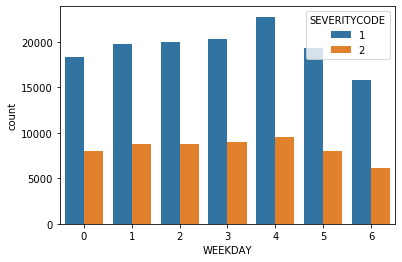

In [3]:
df['WEEKDAY'] = pd.to_datetime(df['INCDATE']).dt.weekday
df.groupby('WEEKDAY')['SEVERITYCODE'].value_counts(normalize= True)
sns.countplot(data = df, x = 'WEEKDAY', hue = 'SEVERITYCODE')

### Eliminate columns of Data not useful

In [4]:
df.drop(['X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO', 
'STATUS', 'INCDATE', 'INCDTTM', 'SDOTCOLNUM','SEGLANEKEY', 'CROSSWALKKEY', 'SEVERITYCODE.1', 'SEVERITYDESC', 'LOCATION','INTKEY', 'ST_COLCODE', 'SDOT_COLCODE',
'EXCEPTRSNCODE', 'EXCEPTRSNDESC', 'PEDROWNOTGRNT', 'SPEEDING', 'INATTENTIONIND'], axis = 1, inplace = True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 16 columns):
SEVERITYCODE     194673 non-null int64
ADDRTYPE         192747 non-null object
COLLISIONTYPE    189769 non-null object
PERSONCOUNT      194673 non-null int64
PEDCOUNT         194673 non-null int64
PEDCYLCOUNT      194673 non-null int64
VEHCOUNT         194673 non-null int64
JUNCTIONTYPE     188344 non-null object
SDOT_COLDESC     194673 non-null object
UNDERINFL        189789 non-null object
WEATHER          189592 non-null object
ROADCOND         189661 non-null object
LIGHTCOND        189503 non-null object
ST_COLDESC       189769 non-null object
HITPARKEDCAR     194673 non-null object
WEEKDAY          194673 non-null int64
dtypes: int64(6), object(10)
memory usage: 16.3+ MB


### Take Care of nan Values for the column 'COLLISIONTYPE' 
In this phase the columns 'SDOT_COLDESC' 'ST_COLDESC' are eliminated and their values are taken in account and grouped into the 'COLLISIONTYPE' column 

In [5]:
# df2 = df[['SDOT_COLDESC', 'ST_COLDESC', 'COLLISIONTYPE', 'HITPARKEDCAR']].copy(deep= True)
r, _ = np.where(df[['SDOT_COLDESC', 'ST_COLDESC', 'COLLISIONTYPE', 'HITPARKEDCAR']].isna())
r = np.unique(r).tolist()



In [6]:
# df['SDOT_COLDESC'].unique()
# df.groupby('SDOT_COLDESC')['SEVERITYCODE'].value_counts(normalize = True )
# df2[df2['SDOT_COLDESC']=='MOTOR VEHICLE STRUCK OBJECT IN ROAD']
# df = df[['SDOT_COLDESC', 'ST_COLDESC', 'COLLISIONTYPE', 'HITPARKEDCAR']].copy(deep= True)

mask_other = (df['COLLISIONTYPE'].isnull()) & (df['SDOT_COLDESC'] == 'MOTOR VEHICLE STRUCK OBJECT IN ROAD')

mask_angles = (df['COLLISIONTYPE'].isnull()) & (df['SDOT_COLDESC'] == 'MOTOR VEHICLE STRUCK MOTOR VEHICLE, FRONT END AT ANGLE')

mask_parked = (df['COLLISIONTYPE'].isnull()) & (df['SDOT_COLDESC'] == 'DRIVERLESS VEHICLE STRUCK MOTOR VEHICLE REAR END') & (df['ST_COLDESC'] == 'One parked--one moving')

mask_rear = (df['COLLISIONTYPE'].isnull()) & (df['SDOT_COLDESC'] == 'MOTOR VEHICLE STRUCK MOTOR VEHICLE, REAR END')

mask_pedestrian = (df['SDOT_COLDESC']=='MOTOR VEHCILE STRUCK PEDESTRIAN') & \
    (df['COLLISIONTYPE'].isnull())

mask_cycles = (df['SDOT_COLDESC']=='MOTOR VEHICLE STRUCK PEDALCYCLIST, FRONT END AT ANGLE') & (df['COLLISIONTYPE'].isnull())

mask_parked1 = (df['SDOT_COLDESC']=='MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT      SIDE SIDESWIPE') & (df['COLLISIONTYPE'].isnull()) & (df['HITPARKEDCAR'] == 'Y') 

mask_sideswipe = (df['SDOT_COLDESC']=='MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE SIDESWIPE') & (df['COLLISIONTYPE'].isnull()) & (df['HITPARKEDCAR'] == 'N')

mask_other1 = (df['SDOT_COLDESC']=='MOTOR VEHICLE RAN OFF ROAD - NO COLLISION') &  (df['COLLISIONTYPE'].isnull())

mask_other2 = (df['SDOT_COLDESC'] == 'NOT ENOUGH INFORMATION / NOT APPLICABLE') & \
(df['COLLISIONTYPE'].isnull())

mask_other3 = (df['SDOT_COLDESC'] == 'MOTOR VEHICLE RAN OFF ROAD - HIT FIXED OBJECT') & (df['COLLISIONTYPE'].isnull())

mask_parked2 = (df['SDOT_COLDESC'] == 'MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE AT ANGLE') & (df['COLLISIONTYPE'].isnull()) & (df['HITPARKEDCAR'] == 'Y')

mask_other4 = (df['SDOT_COLDESC'] == 'MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE AT ANGLE') & (df['COLLISIONTYPE'].isnull()) & (df['HITPARKEDCAR'] == 'N')

mask_other5 = (df['SDOT_COLDESC'] == 'MOTOR VEHICLE OVERTURNED IN ROAD') & \
     (df['COLLISIONTYPE'].isnull())

mask_sideswipe1 = (df['SDOT_COLDESC']=='MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE \
# SIDESWIPE') & (df['COLLISIONTYPE'].isnull()) 

mask_cycles1 = \
(df['SDOT_COLDESC']=='PEDALCYCLIST STRUCK MOTOR VEHICLE FRONT END AT ANGLE')  | \
(df['SDOT_COLDESC']=='PEDALCYCLIST STRUCK MOTOR VEHICLE REAR END')            | \
(df['SDOT_COLDESC']=='PEDALCYCLIST STRUCK MOTOR VEHICLE LEFT SIDE SIDESWIPE') | \
(df['SDOT_COLDESC']=='MOTOR VEHICLE STRUCK PEDALCYCLIST, LEFT SIDE SIDESWIPE')| \
(df['SDOT_COLDESC']=='PEDALCYCLIST OVERTURNED IN ROAD')                       & \
(df['COLLISIONTYPE'].isnull()) 

mask_parked3 = \
(df['SDOT_COLDESC'] == 'MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE AT ANGLE')   | \
(df['SDOT_COLDESC']=='DRIVERLESS VEHICLE STRUCK MOTOR VEHICLE FRONT END AT ANGLE') | \
(df['SDOT_COLDESC']=='DRIVERLESS VEHICLE STRUCK MOTOR VEHICLE REAR END')           | \
(df['SDOT_COLDESC'] == 'MOTOR VEHICLE STRUCK MOTOR VEHICLE, LEFT SIDE SIDESWIPE')   & \
(df['COLLISIONTYPE'].isnull()) 

mask_other6 =\
(df['SDOT_COLDESC']=='DRIVERLESS VEHICLE RAN OFF ROAD - HIT FIXED OBJECT') | \
(df['SDOT_COLDESC']=='MOTOR VEHICLE STRUCK TRAIN') & \
(df['COLLISIONTYPE'].isnull())

mask_parked4 = \
(df['SDOT_COLDESC'] == 'MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE SIDESWIPE') & \
(df['HITPARKEDCAR'] == 'Y')  & \
(df['COLLISIONTYPE'].isnull()) 

mask_sideswipe2 = \
(df['SDOT_COLDESC'] == 'MOTOR VEHICLE STRUCK MOTOR VEHICLE, RIGHT SIDE SIDESWIPE') & \
(df['HITPARKEDCAR'] == 'N')  & \
(df['COLLISIONTYPE'].isnull()) 

df['COLLISIONTYPE'][mask_other] = 'Other'
df['COLLISIONTYPE'][mask_angles] = 'Angles'
df['COLLISIONTYPE'][mask_parked] = 'Parked Car'
df['COLLISIONTYPE'][mask_rear] = 'Rear Ended'
df['COLLISIONTYPE'][mask_pedestrian] = 'Pedestrian'
df['COLLISIONTYPE'][mask_cycles] = 'Cycles'
df['COLLISIONTYPE'][mask_parked1] = 'Parked'
df['COLLISIONTYPE'][mask_sideswipe] = 'Sideswipe'
df['COLLISIONTYPE'][mask_other1] = 'Other'
df['COLLISIONTYPE'][mask_other2] = 'Other'
df['COLLISIONTYPE'][mask_other3] = 'Other'
df['COLLISIONTYPE'][mask_parked2] = 'Parked Car'
df['COLLISIONTYPE'][mask_other4] = 'Other'
df['COLLISIONTYPE'][mask_other5] = 'Other'
df['COLLISIONTYPE'][mask_sideswipe1] = 'Sideswipe'
df['COLLISIONTYPE'][mask_cycles1] = 'Cycles'
df['COLLISIONTYPE'][mask_parked3] = 'Parked Car'
df['COLLISIONTYPE'][mask_other6] = 'Other'
df['COLLISIONTYPE'][mask_parked4] = 'Parked Car'
df['COLLISIONTYPE'][mask_sideswipe2] = 'Sideswipe'

r= np.where(df['COLLISIONTYPE'].isna())[0]
r = np.unique(r).tolist()
len(r)
#  df2.iloc[r,:]
# df2['SDOT_COLDESC'][r]
# df2['COLLISIONTYPE_1'] = df2['COLLISIONTYPE'].apply(lambda x: 'Other' \
#     if (x.isnull()) & \
#   (df2['SDOT_COLDESC'] == 'MOTOR VEHICLE STRUCK OBJECT IN ROAD'))

0

### Last phase of Data Cleaning
Now that the nan have been taken care of the next step is to remove the columns not udeful anymore and finalize the preparation of the data for the modeling phase

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 16 columns):
SEVERITYCODE     194673 non-null int64
ADDRTYPE         192747 non-null object
COLLISIONTYPE    194673 non-null object
PERSONCOUNT      194673 non-null int64
PEDCOUNT         194673 non-null int64
PEDCYLCOUNT      194673 non-null int64
VEHCOUNT         194673 non-null int64
JUNCTIONTYPE     188344 non-null object
SDOT_COLDESC     194673 non-null object
UNDERINFL        189789 non-null object
WEATHER          189592 non-null object
ROADCOND         189661 non-null object
LIGHTCOND        189503 non-null object
ST_COLDESC       189769 non-null object
HITPARKEDCAR     194673 non-null object
WEEKDAY          194673 non-null int64
dtypes: int64(6), object(10)
memory usage: 16.3+ MB


In [9]:
r, _ = np.where(df[['ADDRTYPE']].isna())
r = np.unique(r).tolist()
print( 'size array: ' + str(len(r)) )



size array: 1926


In [10]:
# df[(df['JUNCTIONTYPE'] == 'Unknown')]
# r, _ = np.where( (df[['ADDRTYPE']].isna()) & (df['JUNCTIONTYPE'] == 'Unknown') )
# r = np.unique(r).tolist()
# len(r)
df.groupby('JUNCTIONTYPE')['ADDRTYPE'].value_counts()

JUNCTIONTYPE                                       ADDRTYPE    
At Intersection (but not related to intersection)  Intersection     2094
                                                   Alley               1
                                                   Block               1
At Intersection (intersection related)             Intersection    62782
                                                   Block               4
Driveway Junction                                  Block           10611
                                                   Alley              59
Mid-Block (but intersection related)               Block           22774
                                                   Intersection        1
Mid-Block (not related to intersection)            Block           89330
                                                   Alley             176
                                                   Intersection       11
Ramp Junction                                      Block    

In [11]:
mask_block= (df['JUNCTIONTYPE'] == 'Mid-Block (not related to intersection)') | \
    (df['JUNCTIONTYPE'] == 'Mid-Block (but intersection related)') | \
    (df['JUNCTIONTYPE'] == 'Ramp Junction') | \
    (df['JUNCTIONTYPE'] == 'Driveway Junction') | \
    (df['JUNCTIONTYPE'] == 'Unknown') & \
    (df['ADDRTYPE'].isnull())

mask_intersection= (df['JUNCTIONTYPE'] == 'At Intersection (intersection related)') | \
       (df['JUNCTIONTYPE'] == 'At Intersection (but not related to intersection)') \
        & (df['ADDRTYPE'].isnull())


df['ADDRTYPE'][mask_block] = 'Block'
df['ADDRTYPE'][mask_intersection] = 'Intersection'

In [12]:
r, _ = np.where(df[['ADDRTYPE']].isna())
r = np.unique(r).tolist()

ad = df['ADDRTYPE'].value_counts(normalize = True)

l = len(r)

B = int(np.rint(l* ad[0]))
I = int(np.rint(l * ad[1]))
A = int(np.rint(l * ad[2]))

df.fillna('Block', limit = B, inplace = True)
df.fillna('Intersection', limit = I, inplace = True)
df.fillna('Alley', limit = A, inplace = True)



In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 16 columns):
SEVERITYCODE     194673 non-null int64
ADDRTYPE         194673 non-null object
COLLISIONTYPE    194673 non-null object
PERSONCOUNT      194673 non-null int64
PEDCOUNT         194673 non-null int64
PEDCYLCOUNT      194673 non-null int64
VEHCOUNT         194673 non-null int64
JUNCTIONTYPE     189940 non-null object
SDOT_COLDESC     194673 non-null object
UNDERINFL        191385 non-null object
WEATHER          191188 non-null object
ROADCOND         191257 non-null object
LIGHTCOND        191099 non-null object
ST_COLDESC       191365 non-null object
HITPARKEDCAR     194673 non-null object
WEEKDAY          194673 non-null int64
dtypes: int64(6), object(10)
memory usage: 16.3+ MB


In [14]:
def fill_na_by_percentage(df, col):
    r, _ = np.where(df[[col]].isna())
    r = np.unique(r).tolist()
    l = len(r)
    if l != 0:
        ad = df[col].value_counts(normalize = True)
        # print(ad)
        for i in range(len(ad)):
            L = int(np.floor(l * ad[i]))
            try:
                df[col].fillna(ad.keys()[i], limit = L, inplace = True )
            except:
                r, _ = np.where(df[[col]].isna())
                r = np.unique(r).tolist()
                l = len(r)
                if l > 0:
                    df[col].fillna(ad.keys()[i], limit = l, inplace = True )
                print('Function terminated')
                return
    else:
        print('No nan values in column')
        return

lista = ['LIGHTCOND', 'ROADCOND', 'UNDERINFL', 'WEATHER', 'ADDRTYPE']

for i in lista:
    fill_na_by_percentage(df,i)
# df['ROADCOND'].value_counts(dropna = False)

Function terminated
Function terminated
Function terminated
Function terminated


In [15]:
df.drop(['JUNCTIONTYPE', 'SDOT_COLDESC', 'ST_COLDESC'],inplace = True, axis = 1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 13 columns):
SEVERITYCODE     194673 non-null int64
ADDRTYPE         194673 non-null object
COLLISIONTYPE    194673 non-null object
PERSONCOUNT      194673 non-null int64
PEDCOUNT         194673 non-null int64
PEDCYLCOUNT      194673 non-null int64
VEHCOUNT         194673 non-null int64
UNDERINFL        194673 non-null object
WEATHER          194673 non-null object
ROADCOND         194673 non-null object
LIGHTCOND        194673 non-null object
HITPARKEDCAR     194673 non-null object
WEEKDAY          194673 non-null int64
dtypes: int64(6), object(7)
memory usage: 14.1+ MB


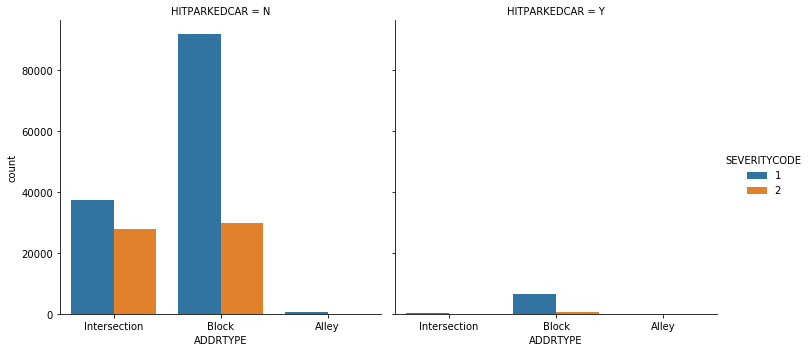

In [16]:
sns.catplot(data = df, x = 'ADDRTYPE', hue = 'SEVERITYCODE', col = 'HITPARKEDCAR', kind = 'count')

In [ ]:
print('ciao')